# The properties of helical random fields

Using the CRPropa-IMAGINE bridge, we generate helical random fields and explore the properties of the shells generated by them


In [37]:
import sys
sys.path.append('/home/lrodrigues/local/lib/python3.7/site-packages/crpropa')
sys.path.append('../')

import imagine as img
from imagine_crpropa import CRPropaHelicalField
from shell import ShellModel, FieldTransformer
import shell.observable as obs
import astropy.units as u
import numpy as np
import shell.visualization as visu

## Preparing the shell model

In [17]:
shell_model = ShellModel(V0=0.0153*u.pc/u.yr,
                         a=1.3, b=10, R=50*u.pc,
                         elapsed_time=1300*u.yr)

L = 70 #*u.pc
N = 128

grid = img.fields.UniformGrid(# coordinate values for edges of the grid box
                       box=[[-L,L],[-L,L],[-L,L]]*u.pc, 
                       # Grid resolution
                       resolution=[N, N, N])

field_transformer = FieldTransformer(grid, shell_model)

## Constructing initial helical field

In [58]:
B = CRPropaHelicalField(grid, parameters={'Brms': 1e-3*u.microgauss,
                                                  'min_scale': 4*L*u.pc/N,
                                                  'max_scale': 100*u.pc,
                                                  'alpha': -11/3,
                                                  'helicity_factor': 1})

In [59]:
Bvec = B.get_data()

<crpropa.Grid3f; proxy of <Swig Object of type 'crpropa::Grid3f *' at 0x7f90e821f240> >
1e-13
0.0021874999999828616
9.999999999921653e-05
-3.6666666666666665
2026814972
1.0


In [60]:
Bvec = Bvec.to(u.microgauss)
Bx0, By0, Bz0 = Bvec[..., 0],  Bvec[..., 1],  Bvec[..., 2]

## Helical shell

In [61]:
n0 = np.ones(grid.shape) * u.cm**(-3) # Constant unit density

In [62]:
n, [Bx, By, Bz] = field_transformer(n0, [Bx0, By0, Bz0])

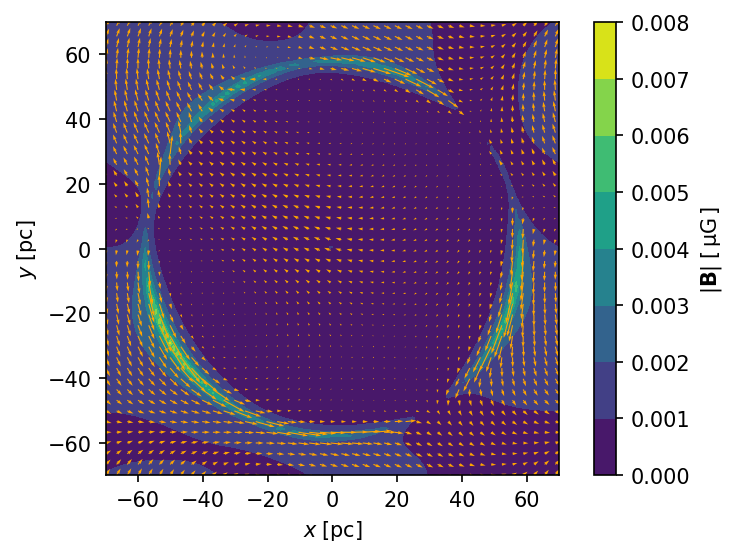

In [63]:
visu.plot_vector_xy(grid, [Bx, By, Bz]);